In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
import scipy as sp

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
SAVEFIG = False

In [2]:
df = pd.read_csv("simu2_data/simu2_Schwartz.csv", header=[0, 1])
df

,adjacent,Unnamed: 1_level_0,remote,Unnamed: 3_level_0
,X,Y,X,Y
0,0.087656,0.535607,0.090233,0.504852
1,0.180422,0.639338,0.182140,0.602582
2,0.304110,0.725172,0.307546,0.694418
3,0.404607,0.776609,0.427799,0.763643
4,0.640818,0.873481,0.661433,0.878625


In [3]:
df.columns = ["adj_X", "adj_Y", "rem_X", "rem_Y"]
df

,adj_X,adj_Y,rem_X,rem_Y
0,0.087656,0.535607,0.090233,0.504852
1,0.180422,0.639338,0.182140,0.602582
2,0.304110,0.725172,0.307546,0.694418
3,0.404607,0.776609,0.427799,0.763643
4,0.640818,0.873481,0.661433,0.878625


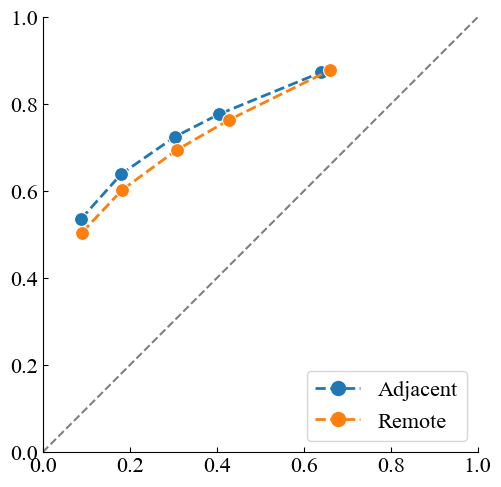

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))
fig.subplots_adjust(left=0.1, right=0.97, bottom=0.1, top=0.97)

ax.spines[["right", "top"]].set_visible(False)
x = np.array([0, 1])
y = np.array([0, 1])
ax.plot(x, y, color="grey", linestyle="dashed")
sns.lineplot(data=df, x="adj_X", y="adj_Y", marker="o", markersize=10, ax=ax, estimator=None, label="adjacent", linewidth=2, linestyle="--")
sns.lineplot(data=df, x="rem_X", y="rem_Y", marker="o", markersize=10, ax=ax, estimator=None, label="remote", linewidth=2, linestyle="--")
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.xlabel("False Alarm Rate")
plt.ylabel("Hit Rate")
ax.set(xlabel=None, ylabel=None)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.xticks(ticks=ticks)
plt.yticks(ticks=ticks)
ax.tick_params(axis="y", direction="in")
ax.tick_params(axis="x", direction="in")
legend_elements = [
    Line2D([0], [0], color=sns.color_palette()[0], lw=2, marker="o", markersize=10, linestyle="--", label="Adjacent"),
    Line2D([0], [0], color=sns.color_palette()[1], lw=2, marker="o", markersize=10, linestyle="--", label="Remote"),
]
plt.legend(handles=legend_elements, loc="lower right")

if SAVEFIG:
    plt.savefig("simu2_fig/simu2_Schwartz_roc.pdf")

In [5]:
df_zroc = pd.DataFrame()
df_zroc["z_new_a"] = sp.stats.norm.ppf(df["adj_X"])
df_zroc["z_new_r"] = sp.stats.norm.ppf(df["rem_X"])
df_zroc["z_old_a"] = sp.stats.norm.ppf(df["adj_Y"])
df_zroc["z_old_r"] = sp.stats.norm.ppf(df["rem_Y"])
df_zroc

,z_new_a,z_new_r,z_old_a,z_old_r
0,-1.355333,-1.339325,0.089373,0.012163
1,-0.913758,-0.907240,0.356689,0.260035
2,-0.512615,-0.502818,0.598277,0.508411
3,-0.241439,-0.181981,0.760790,0.718069
4,0.360646,0.416376,1.143002,1.168139


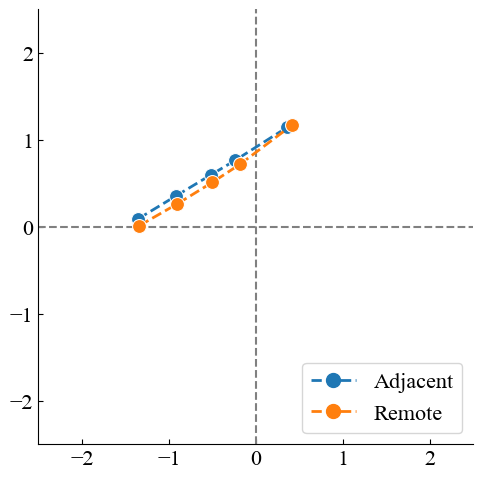

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
fig.subplots_adjust(left=0.1, right=0.97, bottom=0.1, top=0.97)

ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis="y", direction="in")
ax.tick_params(axis="x", direction="in")
plt.axvline(x=0, color="grey", linestyle="dashed")
plt.axhline(y=0, color="grey", linestyle="dashed")
sns.lineplot(data=df_zroc, x="z_new_a", y="z_old_a", marker="o", markersize=10, ax=ax, estimator=None, label="adjacent", linewidth=2, linestyle="--")
sns.lineplot(data=df_zroc, x="z_new_r", y="z_old_r", marker="o", markersize=10, ax=ax, estimator=None, label="remote", linewidth=2, linestyle="--")
plt.ylim([-2.5, 2.5])
plt.xlim([-2.5, 2.5])
plt.xlabel("False Alarm Rate")
plt.ylabel("Hit Rate")
ax.set(xlabel=None, ylabel=None)
legend_elements = [
    Line2D([0], [0], color=sns.color_palette()[0], lw=2, marker="o", markersize=10, linestyle="--", label="Adjacent"),
    Line2D([0], [0], color=sns.color_palette()[1], lw=2, marker="o", markersize=10, linestyle="--", label="Remote"),
]
plt.legend(handles=legend_elements, loc="lower right")

if SAVEFIG:
    plt.savefig("simu2_fig/simu2_Schwartz_zroc.pdf")